In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from ddf_presched import generate_ddf_scheduled_obs
import pandas as pd
from rubin_scheduler.data import get_data_dir
import os
import sqlite3

In [2]:
def count_ddf(note):
    is_ddf = ["DD" in n for n in note]
    return np.sum(is_ddf)

In [3]:
filename = "ddf_ocean_ocean4_v4.3.4_10yrs.db"
run_name = filename.replace('.db', '')
con = sqlite3.connect(filename)
df = pd.read_sql("select * from observations;", con)
con.close()
visits_array = df.to_records()

In [4]:
ddfs = [name for name in np.unique(df["target_name"]) if "DD" in name]

# Fraction of visits going to DDFs, goal of 7%

In [5]:
print("DDF fraction of visits=", count_ddf(visits_array["scheduler_note"])/visits_array.size)

DDF fraction of visits= 0.08105443044841977


# Gaps between nights with DDF Observations

Note this is only taking a numpy.diff, so the shortest timescale is the relevant one. E.g., 100 1-day gaps could mean there are also 50 2-day gaps, 5 20-day gaps, 2 50-day gaps, etc.

/var/folders/jv/jdhmc2t93njct5cx375mztcr0000gn/T/ipykernel_62419/217830648.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


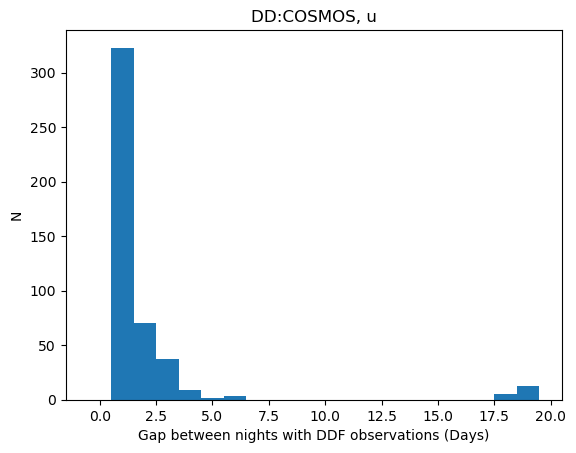

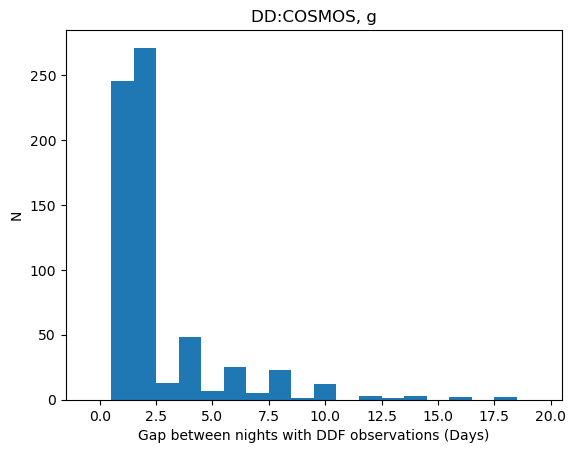

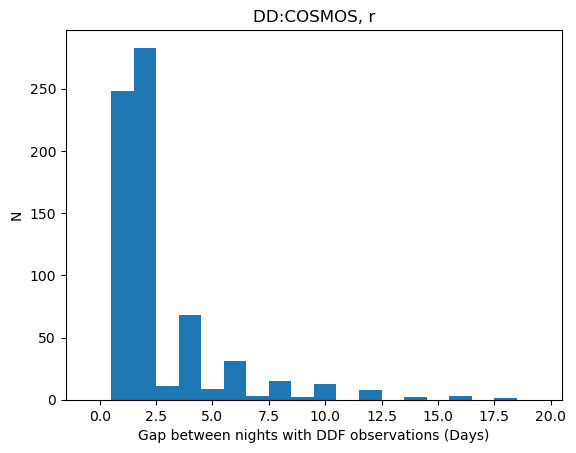

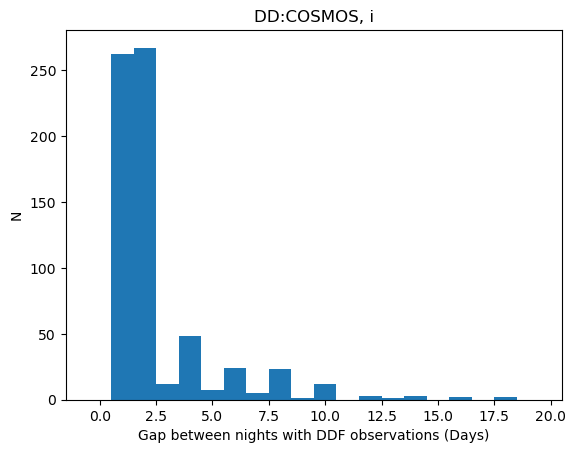

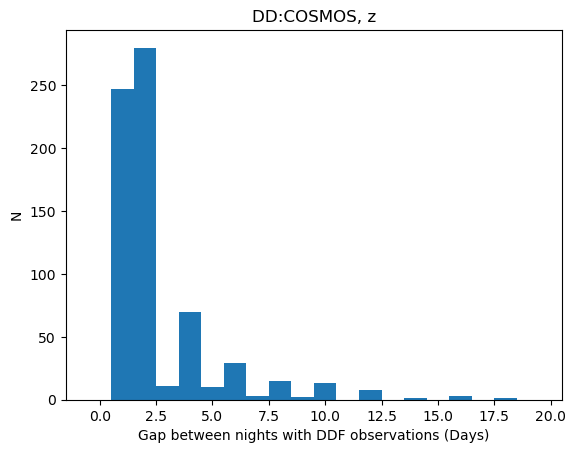

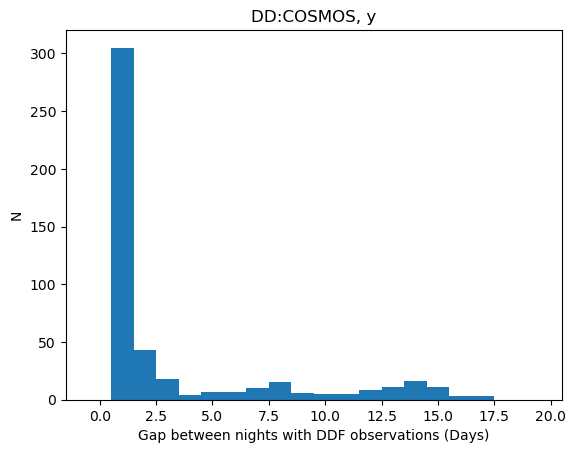

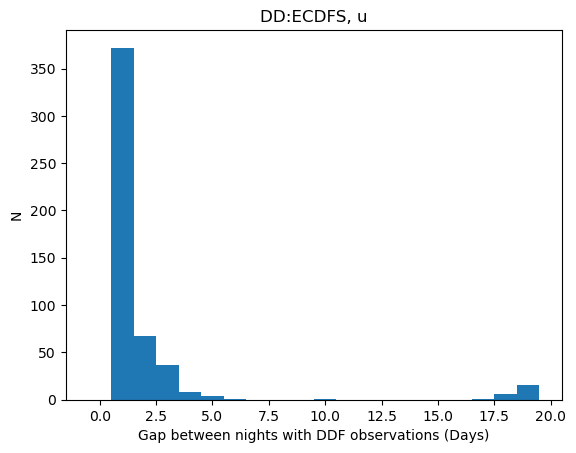

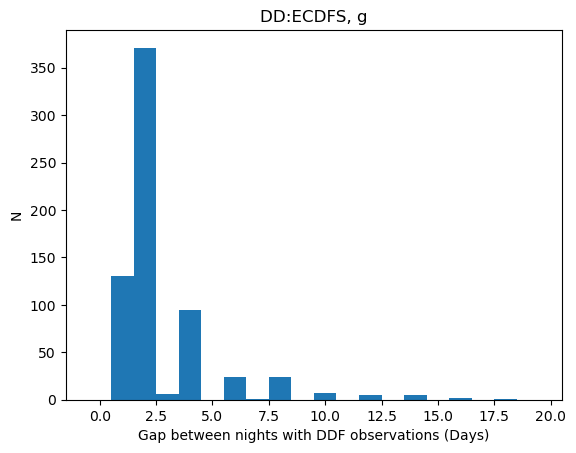

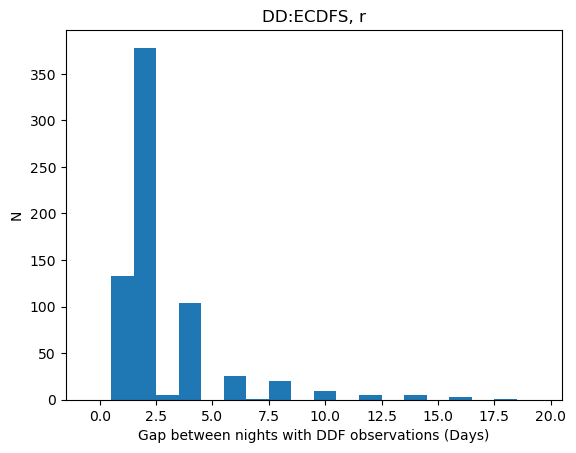

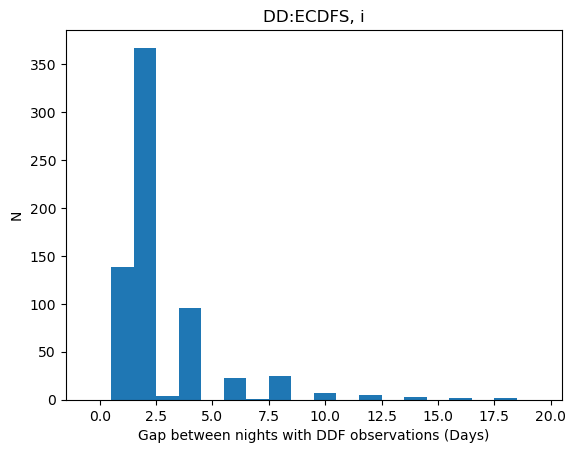

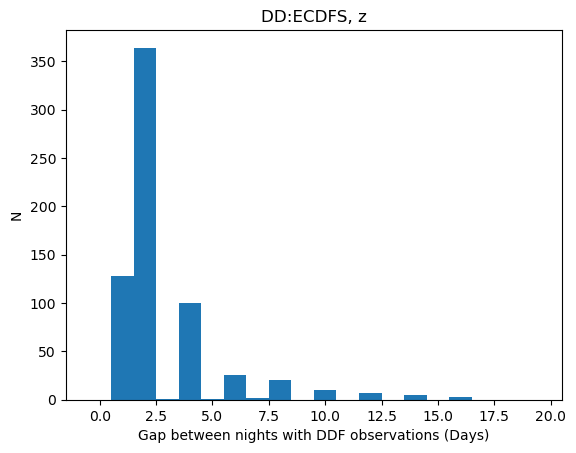

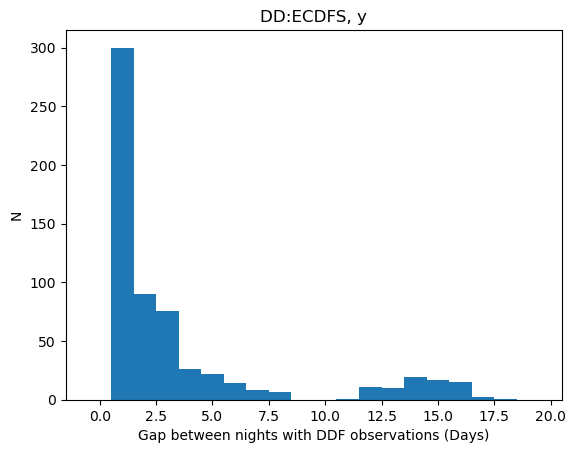

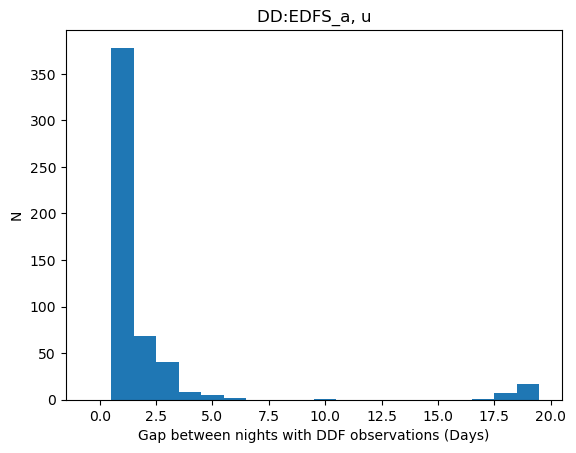

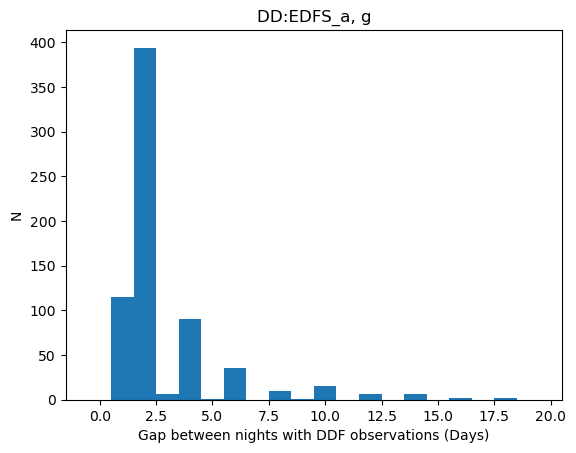

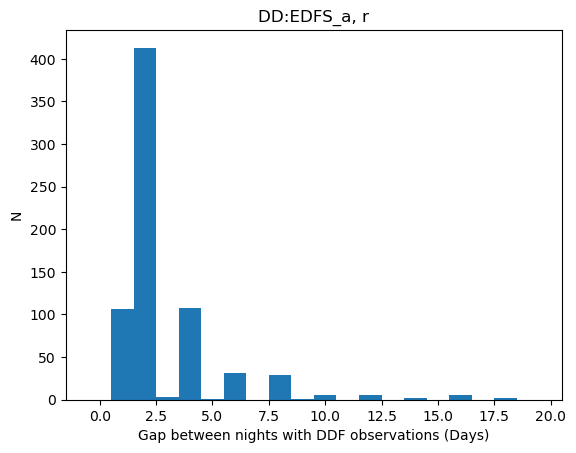

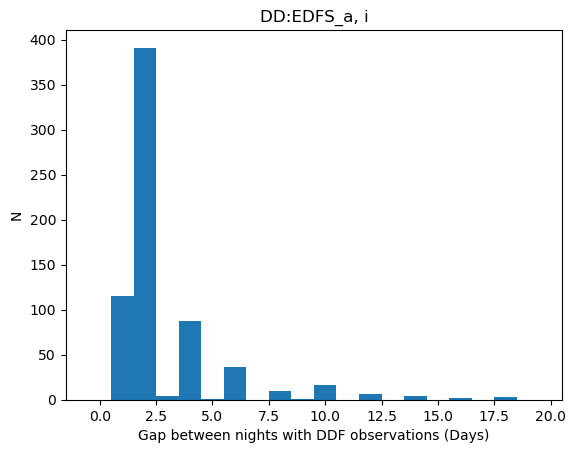

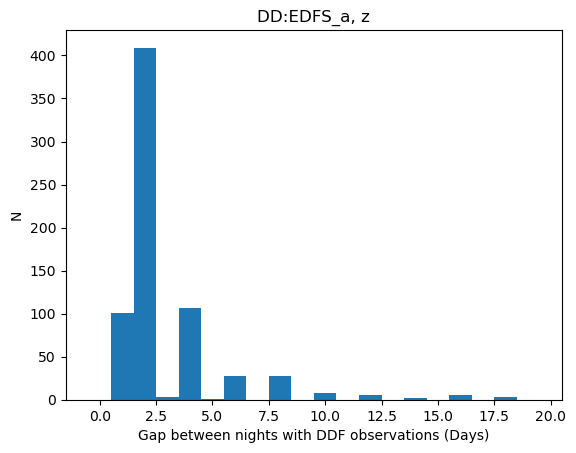

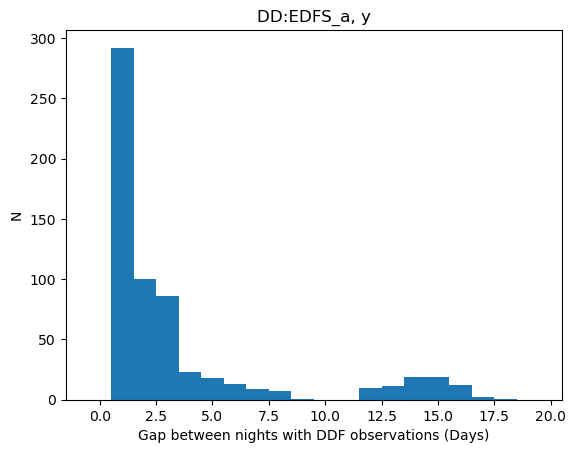

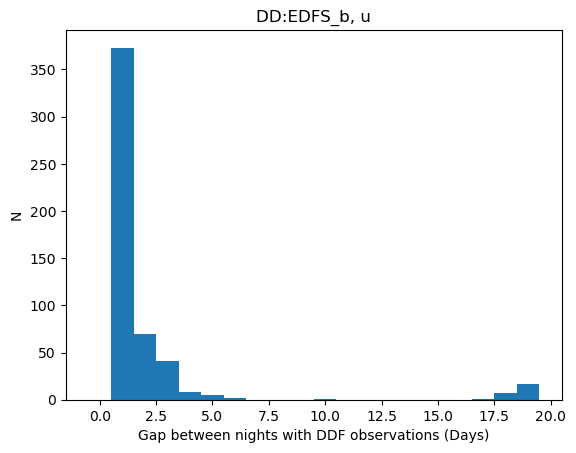

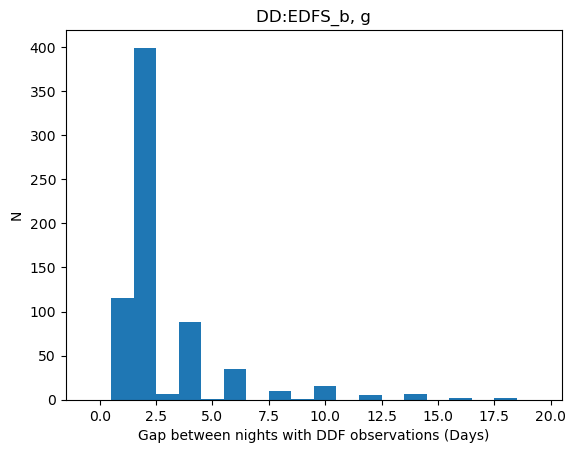

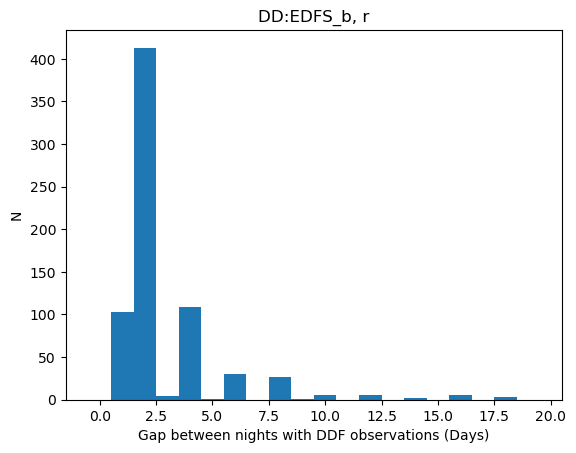

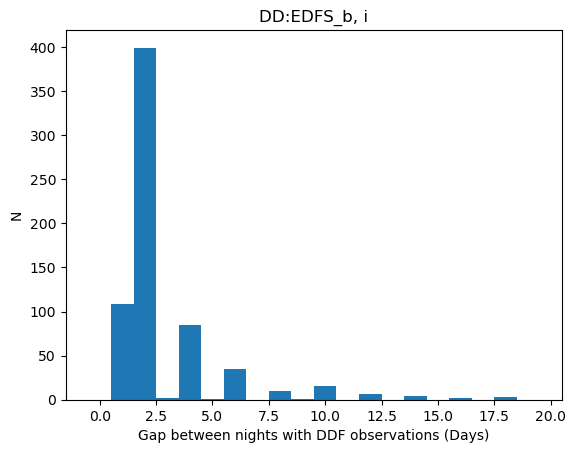

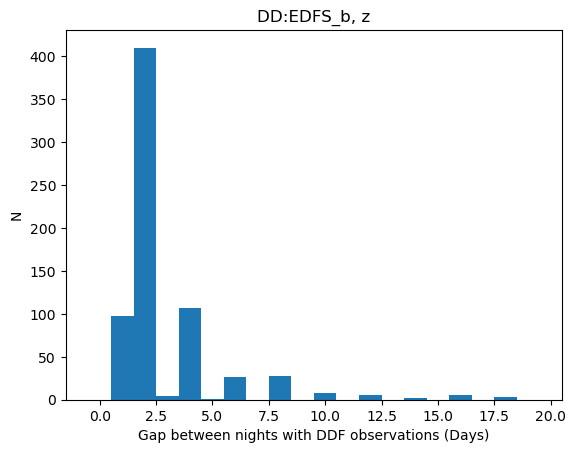

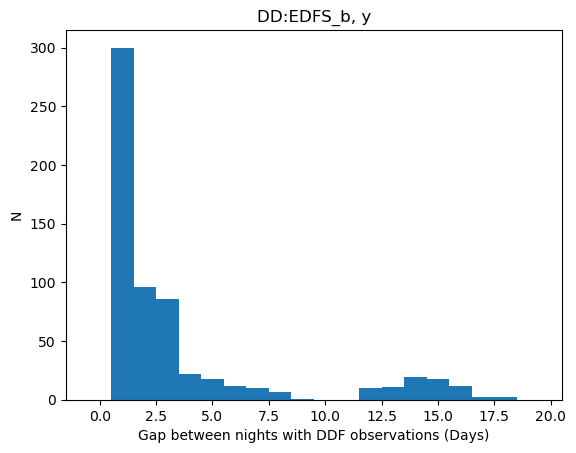

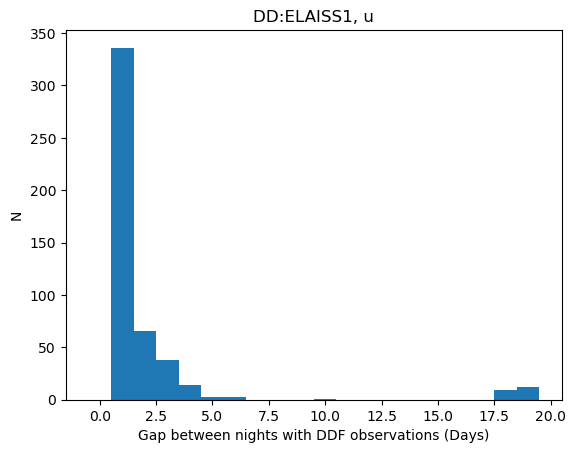

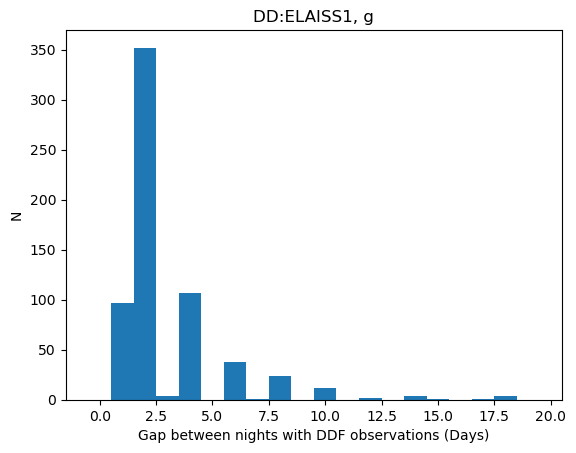

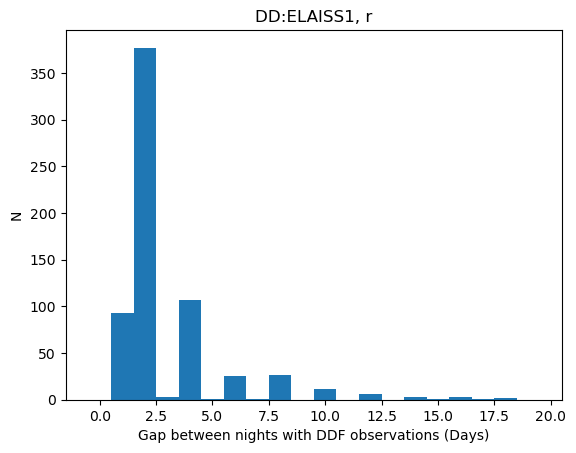

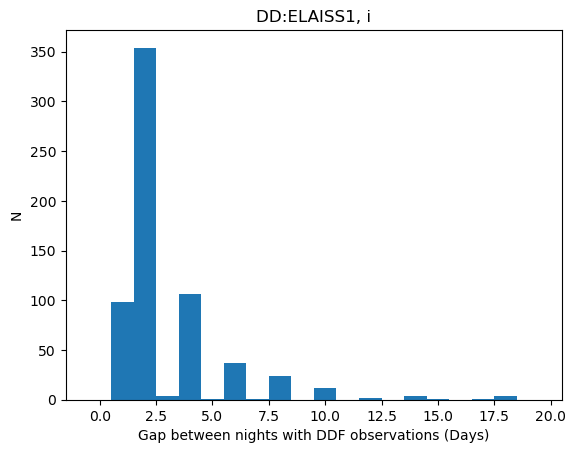

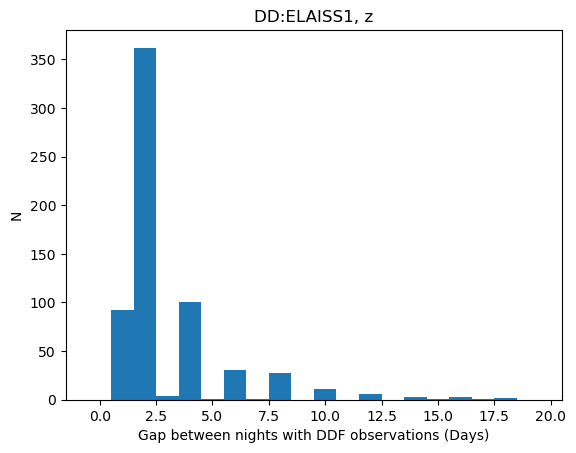

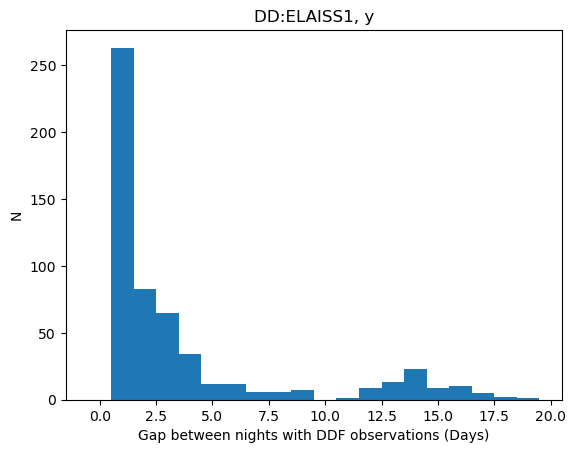

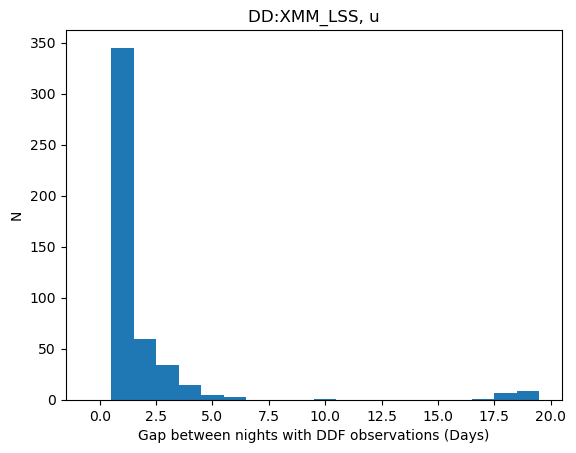

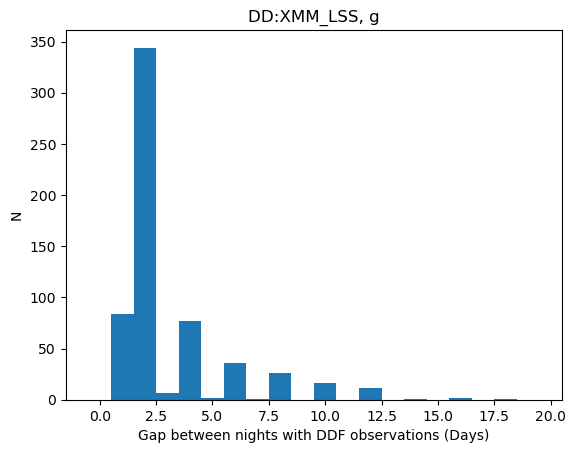

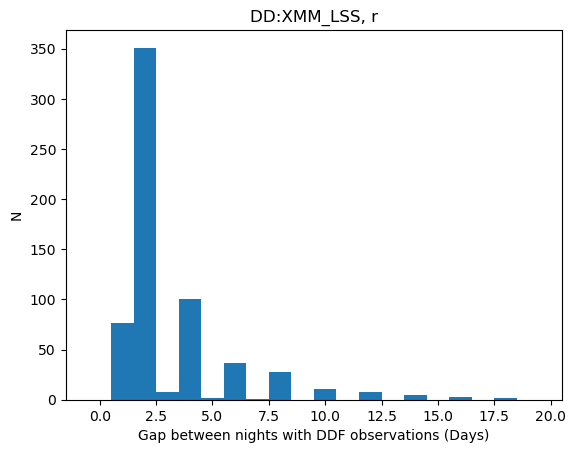

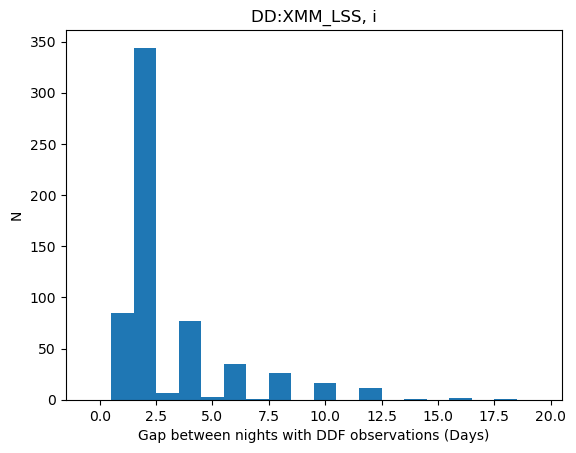

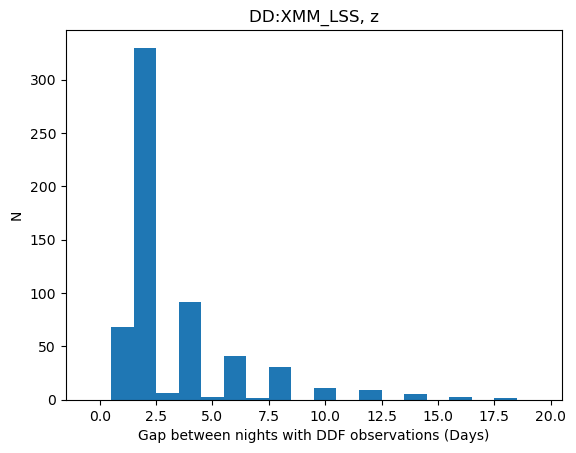

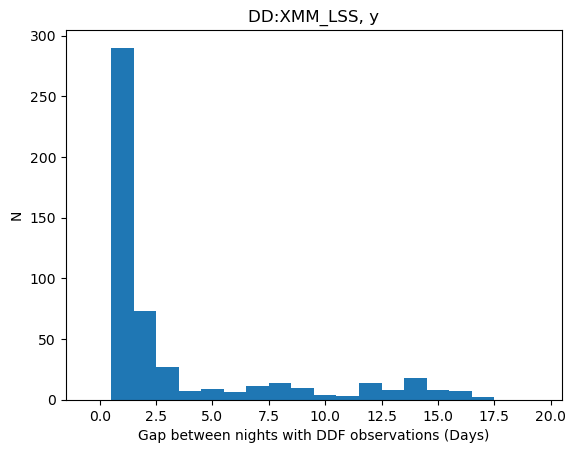

In [6]:
for ddf_name in ddfs:
    for filtername in 'ugrizy':
    
        indx = np.where((df["target_name"] == ddf_name) & (df["filter"] == filtername))
        diff = np.diff(np.unique(df["night"].values[indx]))
        bins = np.arange(21)-0.5
        
        fig, ax = plt.subplots()
        ax.hist(diff, bins=bins)
        ax.set_xlabel('Gap between nights with DDF observations (Days)')
        ax.set_ylabel('N')
        ax.set_title("%s, %s" % (ddf_name, filtername))

# Filter distribution

for reference, WFD is 52, 63, 167, 167, 150, 148



In [7]:
df["year"] = np.floor(df["night"]/365)
df.groupby("year")["scheduler_note"].apply(count_ddf)
dd_names = [name for name in np.unique(df["target_name"]) if "DD" in name]

for dd in dd_names:
    indx = np.where(visits_array["target_name"] == dd)[0]
    labels, counts = np.unique(visits_array["filter"][indx],return_counts=True)

    print(dd, "Total visits=", np.size(indx))
    for filtername in 'ugrizy':
        indx = np.where(labels == filtername)[0]
        print(labels[indx][0], counts[indx][0])
    print("")

DD:COSMOS Total visits= 49794
u 4025
g 1773
r 5782
i 17338
z 15712
y 5164

DD:ECDFS Total visits= 24362
u 2922
g 1084
r 2555
i 7092
z 6643
y 4066

DD:EDFS_a Total visits= 20687
u 2246
g 1089
r 2475
i 6320
z 5861
y 2696

DD:EDFS_b Total visits= 20557
u 2244
g 1090
r 2468
i 6279
z 5780
y 2696

DD:ELAISS1 Total visits= 22630
u 2833
g 1032
r 2387
i 6591
z 6131
y 3656

DD:XMM_LSS Total visits= 21665
u 2738
g 989
r 2290
i 6456
z 5782
y 3410

